In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from skimage import io
from scipy import ndimage as ndi
from skimage import feature
from skimage.filters import gaussian
from skimage.filters import sobel
from skimage.exposure import equalize_hist
from skimage.exposure import equalize_adapthist
from skimage.exposure import rescale_intensity
from skimage.feature import canny
from scipy.ndimage.morphology import binary_fill_holes
from skimage.measure import label
from skimage.measure import regionprops
import pandas as pd

In [2]:
# Replace this with the path to battdeg.py module in your system
sys.path.insert(0, '/Users/sages/Desktop/DataScience/musical-robot/musicalrobot')

In [3]:
import irtemp

In [4]:
frames = io.imread('../doc/PPA_Melting_6_14_19.tiff')

#### Flipping all the frames horizontally and vertically to correct for the mirroring during recording

In [5]:
flip_frame = []
for frame in frames:    
    f_frame = np.fliplr(frame)
    flip_frame.append(np.flipud(f_frame))

In [6]:
len(frames)

1619

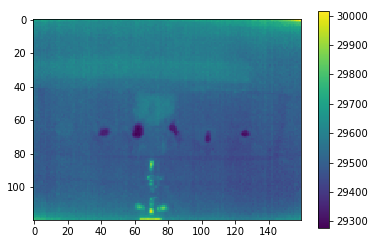

In [7]:
plt.imshow(frames[0])
plt.colorbar()


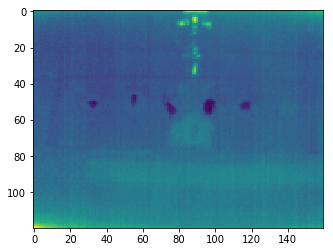

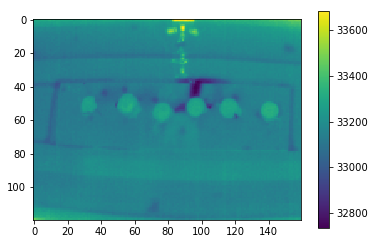

In [8]:
plt.imshow(flip_frame[0])
plt.show()
plt.imshow(flip_frame[1500])
plt.colorbar()

In [9]:
for i in range(len(flip_frame[0])):
    frame = frame[40:80]

In [10]:
crop_frame = []
for frame in flip_frame:
    crop_frame.append(frame[40:100])

In [11]:
edges = feature.canny(crop_frame[0]/1500)


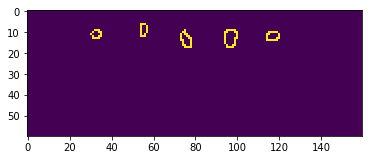

In [12]:
plt.imshow(edges)

In [13]:
from skimage.morphology import remove_small_objects   
filled_wells = binary_fill_holes(edges)
cl_wells = remove_small_objects(filled_wells,min_size=20)
labeled_wells = label(cl_wells)

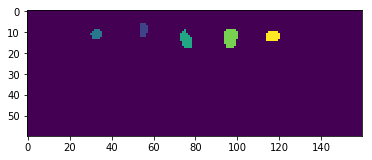

In [40]:
plt.imshow(labeled_wells)

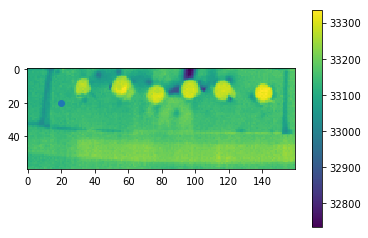

In [15]:
plt.imshow(crop_frame[1500])
plt.colorbar()
plt.scatter(20,20)

In [16]:
frames[0][20][100]

29577

In [31]:
regprops = {} 
for i in range(len(crop_frame)):
    props = regionprops(labeled_wells, intensity_image=crop_frame[i])
    x = np.zeros(len(props)).astype(int)
    y = np.zeros(len(props)).astype(int)
    area = np.zeros(len(props))
    perim = np.zeros(len(props))
    intensity = np.zeros(len(props),dtype=np.float64)

    c = 0
    for prop in props:
        x[c] = int(prop.centroid[0])
        y[c] = int(prop.centroid[1])
        #print(y[c])
        area[c] = prop.area
        perim[c] = prop.perimeter
        intensity[c] = crop_frame[i][x[c]][y[c]]
        c = c + 1

    regprops[i] = pd.DataFrame({'X': x, 'Y': y, 'Area': area,
                            'Perim': perim, 'Mean Intensity': intensity},dtype=np.float64)

In [32]:
for i in range(len(crop_frame)):
    if len(regprops[i]) != 5:
        print('Wrong number of samples')
        print(i)

In [95]:
sample_temp = []
for j in range(5):
    temp_well = []
    for i in range(len(crop_frame)):
        temp_well.append(irtemp.centikelvin_to_celsius(regprops[i]['Mean Intensity'][j]))
    sample_temp.append(temp_well)   

In [96]:
len(sample_temp)

5

In [97]:
len(sample_temp[0])

1619

## Temperature of the plate

In [93]:
plate_temp = []
for i in range(len(crop_frame)):
    plate_temp.append(irtemp.centikelvin_to_celsius(crop_frame[i][20][20]))
    

In [94]:
len(plate_temp)

1619

1619

Text(0, 0.5, 'Temperature of the PPA sample($^\\circ$C)')

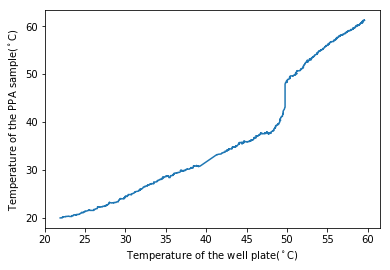

In [98]:
plt.plot(plate_temp,sample_temp[1])
plt.xlabel('Temperature of the well plate($^\circ$C)')
plt.ylabel('Temperature of the PPA sample($^\circ$C)')

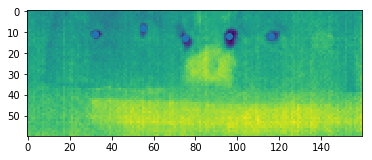

In [41]:
plt.imshow(crop_frame[0])
plt.scatter(y,x)